<a href="https://colab.research.google.com/github/eunpro/academy/blob/main/exam_02_principles_of_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

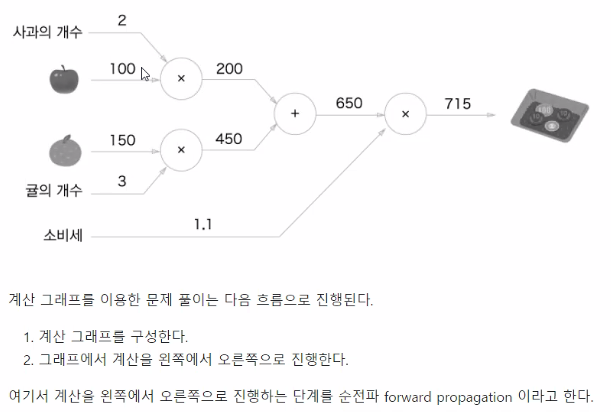

In [ ]:
#덧셈그래프
class add_graph:
  def __init__(self): #메모리 확보 안함 why? 미분 시 값이 없기 때문에 필요 X
    pass
  def forward(self, x, y):
    out = x + y
    return out
  def backward(self, dout): #덧셈 미분
    dx = 1 * dout #x에 대해 미분
    dy = 1 * dout #y에 대해 미분
    return dx, dy

In [ ]:
#곱셈그래프
class mul_graph:
  def __init__(self): #메모리 확보 => backword실행 시 메모리 필요
    self.x= None
    self.y= None
  def forward(self, x, y):
    self.x = x
    self.y = y
    out = x * y
    return out 
  def backward(self, dout): #곱셈 미분
    dx = self.y * dout #x에 대해 미분
    dy = self.x * dout #y에 대해 미분
    return dx, dy

In [ ]:
#MSE그래프 => 포물선 형태
#경사하강법은 미분의 극대/극소 개념을 이용하여 비용함수의 변화량을 상태를 파악하고 지속적으로 가중치를 갱신합니다. 이 과정을 반복하여 비용이 최소가 되는 가중치를 찾습니다.
#backward(미분)하기 위해선 forward 선행되어야 함
class mse_graph: #mse_graph 클래스 생성
  def __init(self): #메모리에 변수위한 공간 할당 #생성자함수__init__
    self.loss = None 
    self.y = None
    self.t = None
    self.x = None

  def forward(self, y, t): #메모리 값 저장
  #mse 계산하는 함수 , y는 만들어진 결과값, t는 목표로 하는 타겟값(정답값)
    self.t = t
    self.y = y
    self.loss = np.square(self.t - self.y).sum() / self.t.shape[0] 
    #np.square ()안의 수 제곱해줌, self.t.shape[0] =100
    return self.loss

  def backward(self, x, dout=1): #저장된 값 미분
    data_size = self.t.shape[0]
    dweight_mse = (((self.y - self.t)*x).sum()*2 / data_size)
    dbias_mse = (self.y - self.t).sum() * 2 / data_size
    return dweight_mse, dbias_mse  

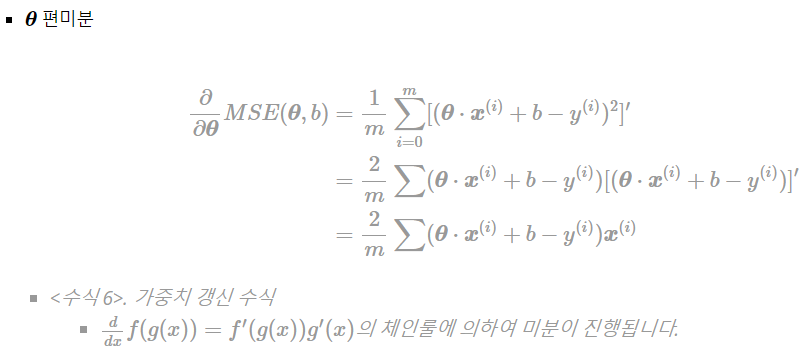

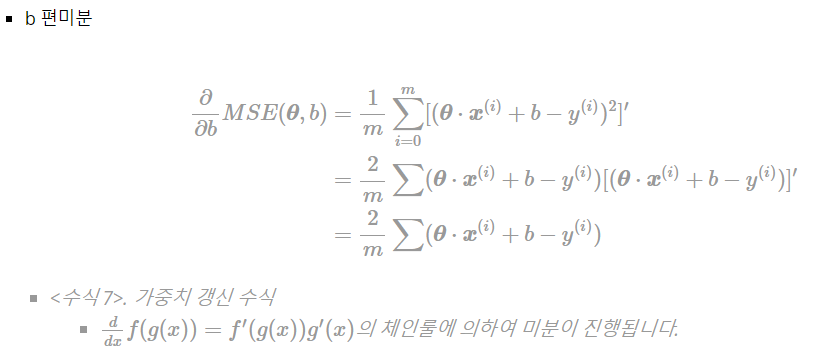

In [ ]:
apple = 10
apple_num = 3
orange = 150
orange_num = 3
tax = 1.1

In [ ]:
#mul_apple_graph에 mul_graph()패키지 적용(위치 할당)
mul_apple_graph = mul_graph() 
mul_orange_graph = mul_graph()
add_apple_orange_graph = add_graph()
mul_tax_graph = mul_graph()

In [ ]:
apple_price = mul_apple_graph.forward(
    apple, apple_num)
orange_price = mul_orange_graph.forward(
    orange, orange_num)
all_price = add_apple_orange_graph.forward(
    apple_price, orange_price)
total_price = mul_tax_graph.forward(
    all_price, tax)
print(total_price)

528.0


In [ ]:
#총 가격을 미분
dprice = 1
#mul_tax_graph패키지의 backward에 dprice로 미분하여 dall_price, dtax값 부여
dall_price, dtax = mul_tax_graph.backward(dprice)
#add_apple_orange_graph패키지의 backward에 dall_price로 미분하여 dapple_price, dorange_price값 부여
dapple_price, dorange_price = add_apple_orange_graph.backward(dall_price)
#mul_orange_graph패키지의 backward에 dorange_price로 미분하여 dorange, dorange_num값 부여
dorange, dorange_num = mul_orange_graph.backward(dorange_price)
#mul_apple_graph패키지의 backward에 dapple_price로 미분하여 dapple, dapple_num값 부여
dapple, dapple_num = mul_apple_graph.backward(dapple_price)

print('dApple', dapple)
print('dApple_num', dapple_num)
print('dOrange', dorange)
print('dOrange_num', dorange_num)

dApple 3.3000000000000003
dApple_num 11.0
dOrange 3.3000000000000003
dOrange_num 165.0


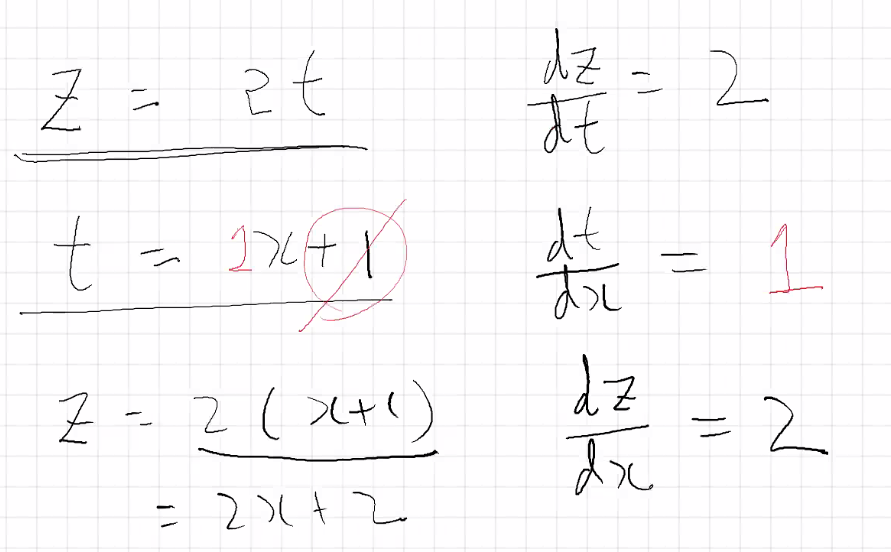

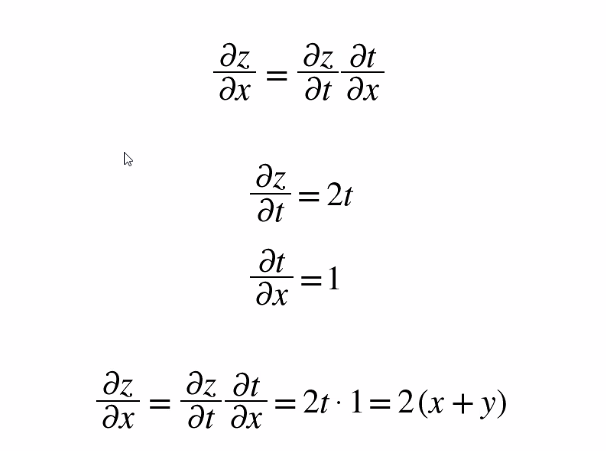

초기 모델

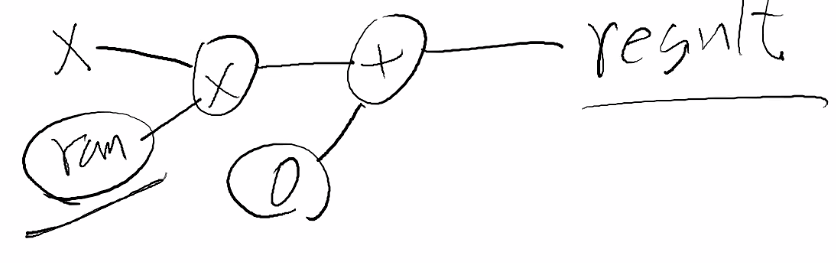

In [ ]:
import numpy as np

def celcius_to_fathrenheit(x):
  return x * 1.8 + 32

In [ ]:
#weight값, bias값 찾아가는 그래프
weight_graph = mul_graph() #곱셈 그래프
bias_graph = add_graph() #덧셈 그래프

In [ ]:
weight = np.random.uniform(0, 5, 1) #0에서 5사이 값 중 1개
print(weight)
bias = 0
data_C = np.array(range(0,100)) #0부터 99까지 #섭씨 값
data_F = celcius_to_fathrenheit(data_C) #화씨 값
scaled_data_C = data_C/100
scaled_data_F = data_F/100
print(scaled_data_C)
print(scaled_data_F)

[3.39779026]
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
[0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.72

In [ ]:
#계산실시
weighted_data = weight_graph.forward(
    weight, scaled_data_C)
predict_data = bias_graph.forward(
    weighted_data, bias)
print(predict_data)

[0.         0.0339779  0.06795581 0.10193371 0.13591161 0.16988951
 0.20386742 0.23784532 0.27182322 0.30580112 0.33977903 0.37375693
 0.40773483 0.44171273 0.47569064 0.50966854 0.54364644 0.57762434
 0.61160225 0.64558015 0.67955805 0.71353595 0.74751386 0.78149176
 0.81546966 0.84944756 0.88342547 0.91740337 0.95138127 0.98535917
 1.01933708 1.05331498 1.08729288 1.12127079 1.15524869 1.18922659
 1.22320449 1.2571824  1.2911603  1.3251382  1.3591161  1.39309401
 1.42707191 1.46104981 1.49502771 1.52900562 1.56298352 1.59696142
 1.63093932 1.66491723 1.69889513 1.73287303 1.76685093 1.80082884
 1.83480674 1.86878464 1.90276254 1.93674045 1.97071835 2.00469625
 2.03867416 2.07265206 2.10662996 2.14060786 2.17458577 2.20856367
 2.24254157 2.27651947 2.31049738 2.34447528 2.37845318 2.41243108
 2.44640899 2.48038689 2.51436479 2.54834269 2.5823206  2.6162985
 2.6502764  2.6842543  2.71823221 2.75221011 2.78618801 2.82016591
 2.85414382 2.88812172 2.92209962 2.95607752 2.99005543 3.02403

In [ ]:
#미분실시
dout = 1
dbias, dbiased_data = bias_graph.backward(dout)
dweight, dscaled_data_C = weight_graph.backward(dbiased_data)
print(dbias)
print(dweight)

1
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


손실함수 MSE(Mean Squared Error): 오차를 제곱하여 평균 낸 것

손실함수는 정답에 가까울수록 작은 값이 나온다.

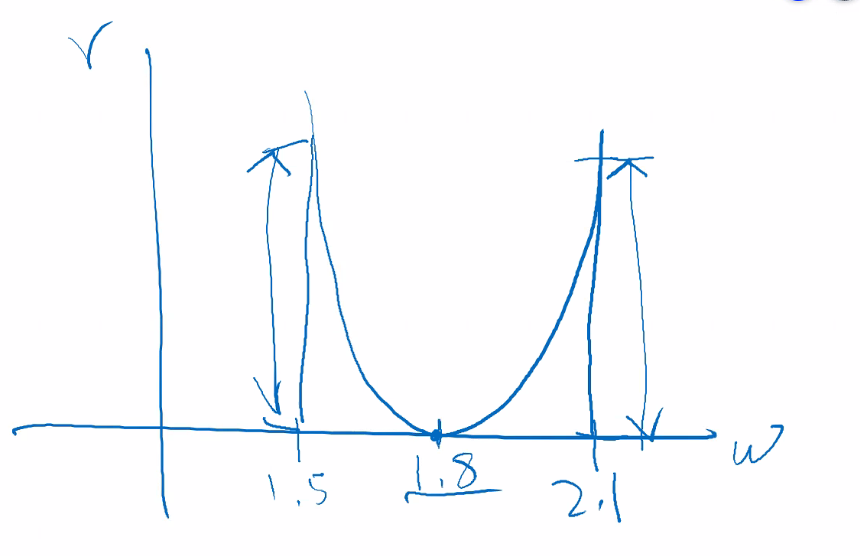

ㄴ 잡음 존재 X

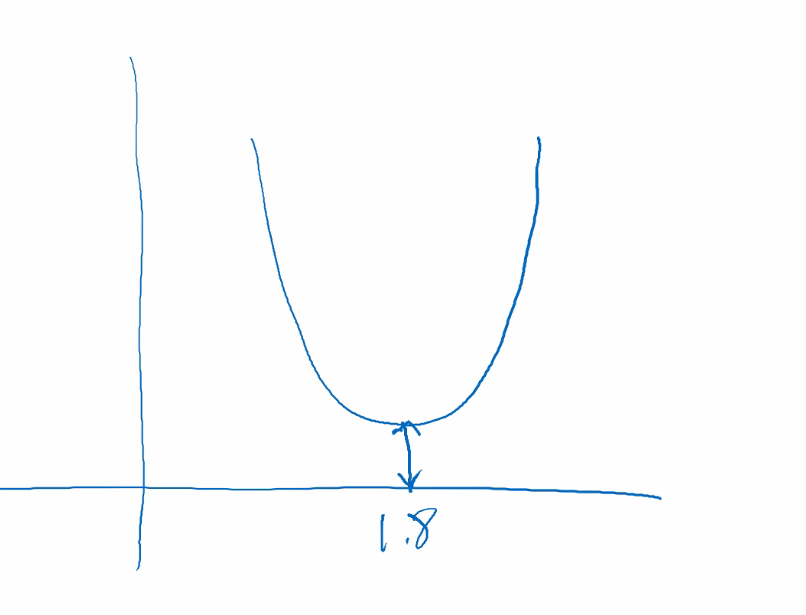

ㄴ 잡음 존재 O

MSE를 미분 

 미분계수가 - > 정답보다 왼쪽 위치 : 현재 값보다 조금 숫자 더해줌

 미분계수가 + > 정답보다 오른쪽 위치 : 현재 값보다 조금 숫자 줄여줌

In [ ]:
mseGraph = mse_graph() #mse_graph클래스의 __init__함수 실행
mse = mseGraph.forward(predict_data,
                       scaled_data_F)
print(mse)

0.4344758298963909


In [ ]:
weight_mse_gradient, bias_mse_gradient = \
  mseGraph.backward(scaled_data_C) #data스케일링 하는 이유
print(weight_mse_gradient)  
print(bias_mse_gradient)

0.7324688628098263
0.9418123559947128


데이터스케일링? 데이터 범위가 같아지도록 데이터 값을 조정하는 것을 의미​

  표준화와 정규화 존재

 bias는 참 값들과 추정 값들의 차이(or 평균간의 거리)를 의미

 ariance는 추정 값들의 흩어진 정도를 의미

In [ ]:
learning_rate = 0.1 #미분값 조금씩 조정하며 정답에 가깝게 함
learned_weight = weight - learning_rate * weight_mse_gradient * np.average(dweight) 
#ㄴ1회 수행 = weight값 한 번 수정
#여러번 수행할수록 점점 정답값에 가까워짐
#mse미분값, weight미분값의 평균값을 곱해서 현재 weight에서 빼줌
print('before learning weight :', weight)
print('after learning weight :',learned_weight) 
#원래는 learned_weight이 weight보다 더 작아야하는데 bias값 때문에 더 크게 나옴

before learning weight : [3.39779026]
after learning weight : [3.36153305]


In [ ]:
learned_bias = bias - learning_rate * bias_mse_gradient * dbias
#ㄴ1회 수행 = bias값 한 번 수정
#여러번 수행할수록 점점 정답값에 가까워짐
print('before learning bias :', bias)
print('after learning bias :', learned_bias)

before learning bias : 0
after learning bias : -0.09418123559947128


In [ ]:
error_list = [] #error값 저장할 빈 list생성
weight_list = [] #weight값 저장할 빈 list생성
bias_list = [] #bias값 저장할 빈 list생성
for i in range(1000):
  #forward 계산 실시
  weighted_data = weight_graph.forward(
      weight, scaled_data_C)
  predict_data = bias_graph.forward(
      weighted_data, bias)
  #backward 미분 실시
  dout = 1
  dbias, dbiased_data = bias_graph.backward(dout)
  dweight, dscaled_data_C = \
    weight_graph.backward(dbiased_data)
  #mse
  mse = mseGraph.forward(
      predict_data, scaled_data_F)
  error_list.append(mse)
  weight_mse_gradient, bias_mse_gradient = \
    mseGraph.backward(scaled_data_C)
  weight_list.append(weight)
  weight = weight - learning_rate * \
    weight_mse_gradient * np.average(dweight)
  bias_list.append(bias)
  bias = bias - learning_rate * \
    bias_mse_gradient * dbias
weight_list.append(weight)
bias_list.append(bias)
print(weight)
print(bias)


[1.80095077]
0.3195114701241902


In [ ]:
print(error_list[-1])

7.67644638189972e-08


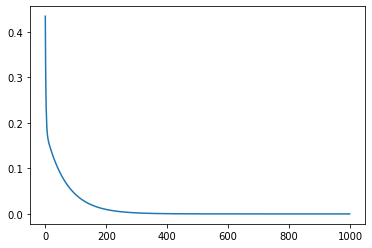

In [ ]:
import matplotlib.pyplot as plt
plt.plot(error_list)
plt.show()

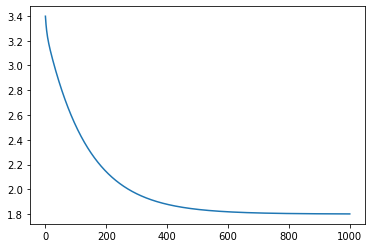

In [ ]:
plt.plot(weight_list)
plt.show()

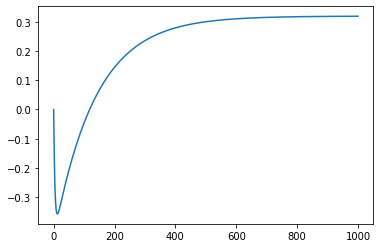

In [ ]:
plt.plot(bias_list)
plt.show()

weight, bias로 된 세포를 갖고 단순한 계산 하도록 함

여러층으로 쌓이고 복잡해질수록 딥러닝

잡음이 많이 섞인 데이터도 활용 가능

모델에 입력값, 출력값 데이터가 여러개 된 것을 주고
규칙을 찾으며 최적의 값을 찾도록 함
